In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv(r"C:\Imp\SamanyuK\Datasets\user_behavior_dataset.csv")
df

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3
...,...,...,...,...,...,...,...,...,...,...,...
695,696,iPhone 12,iOS,92,3.9,1082,26,381,22,Male,2
696,697,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,59,Male,4
697,698,Google Pixel 5,Android,99,3.1,942,22,457,50,Female,2
698,699,Samsung Galaxy S21,Android,62,1.7,431,13,224,44,Male,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


****
## Data Visualization ##
****

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

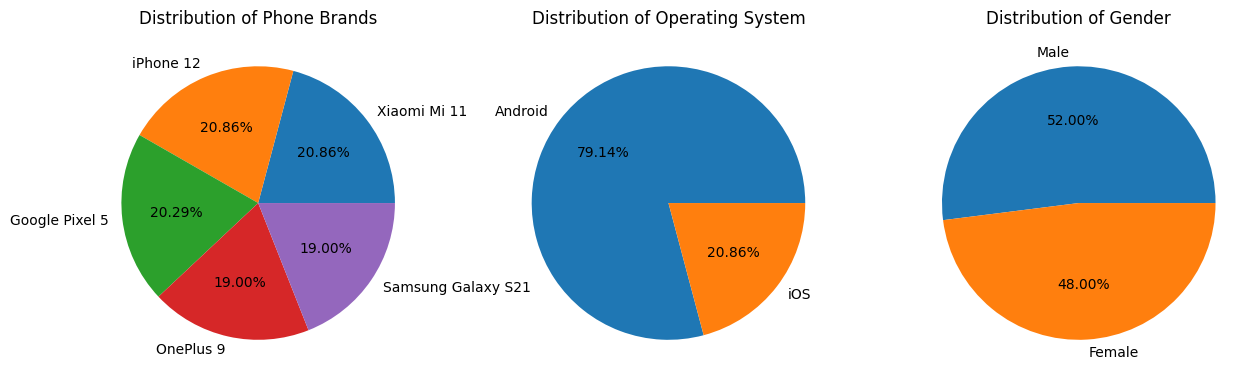

In [5]:
tdf=df['Device Model'].value_counts().reset_index()
tdf1=df['Operating System'].value_counts().reset_index()
tdf2=df['Gender'].value_counts().reset_index()
fig,ax=plt.subplots(1,3,figsize=(15,6))
ax[0].pie(x=tdf['count'],labels=tdf['Device Model'],autopct='%.2f%%')
ax[0].set_title("Distribution of Phone Brands")
ax[1].pie(x=tdf1['count'],labels=tdf1['Operating System'],autopct='%.2f%%')
ax[1].set_title("Distribution of Operating System")
ax[2].pie(x=tdf2['count'],labels=tdf2['Gender'],autopct='%.2f%%')
ax[2].set_title("Distribution of Gender")
plt.show()

**Findings**

1. This dataset contains 5 different Phone brands. All of them constitute around 20 percent of the dataset each
2. Two types of Operating systems, Android makes up aroung 80 percent of the dataset (makes sense cause 4 out of 5 phone brands use Android :) )
3. Dataset contains a balanced ratio of Male to Female

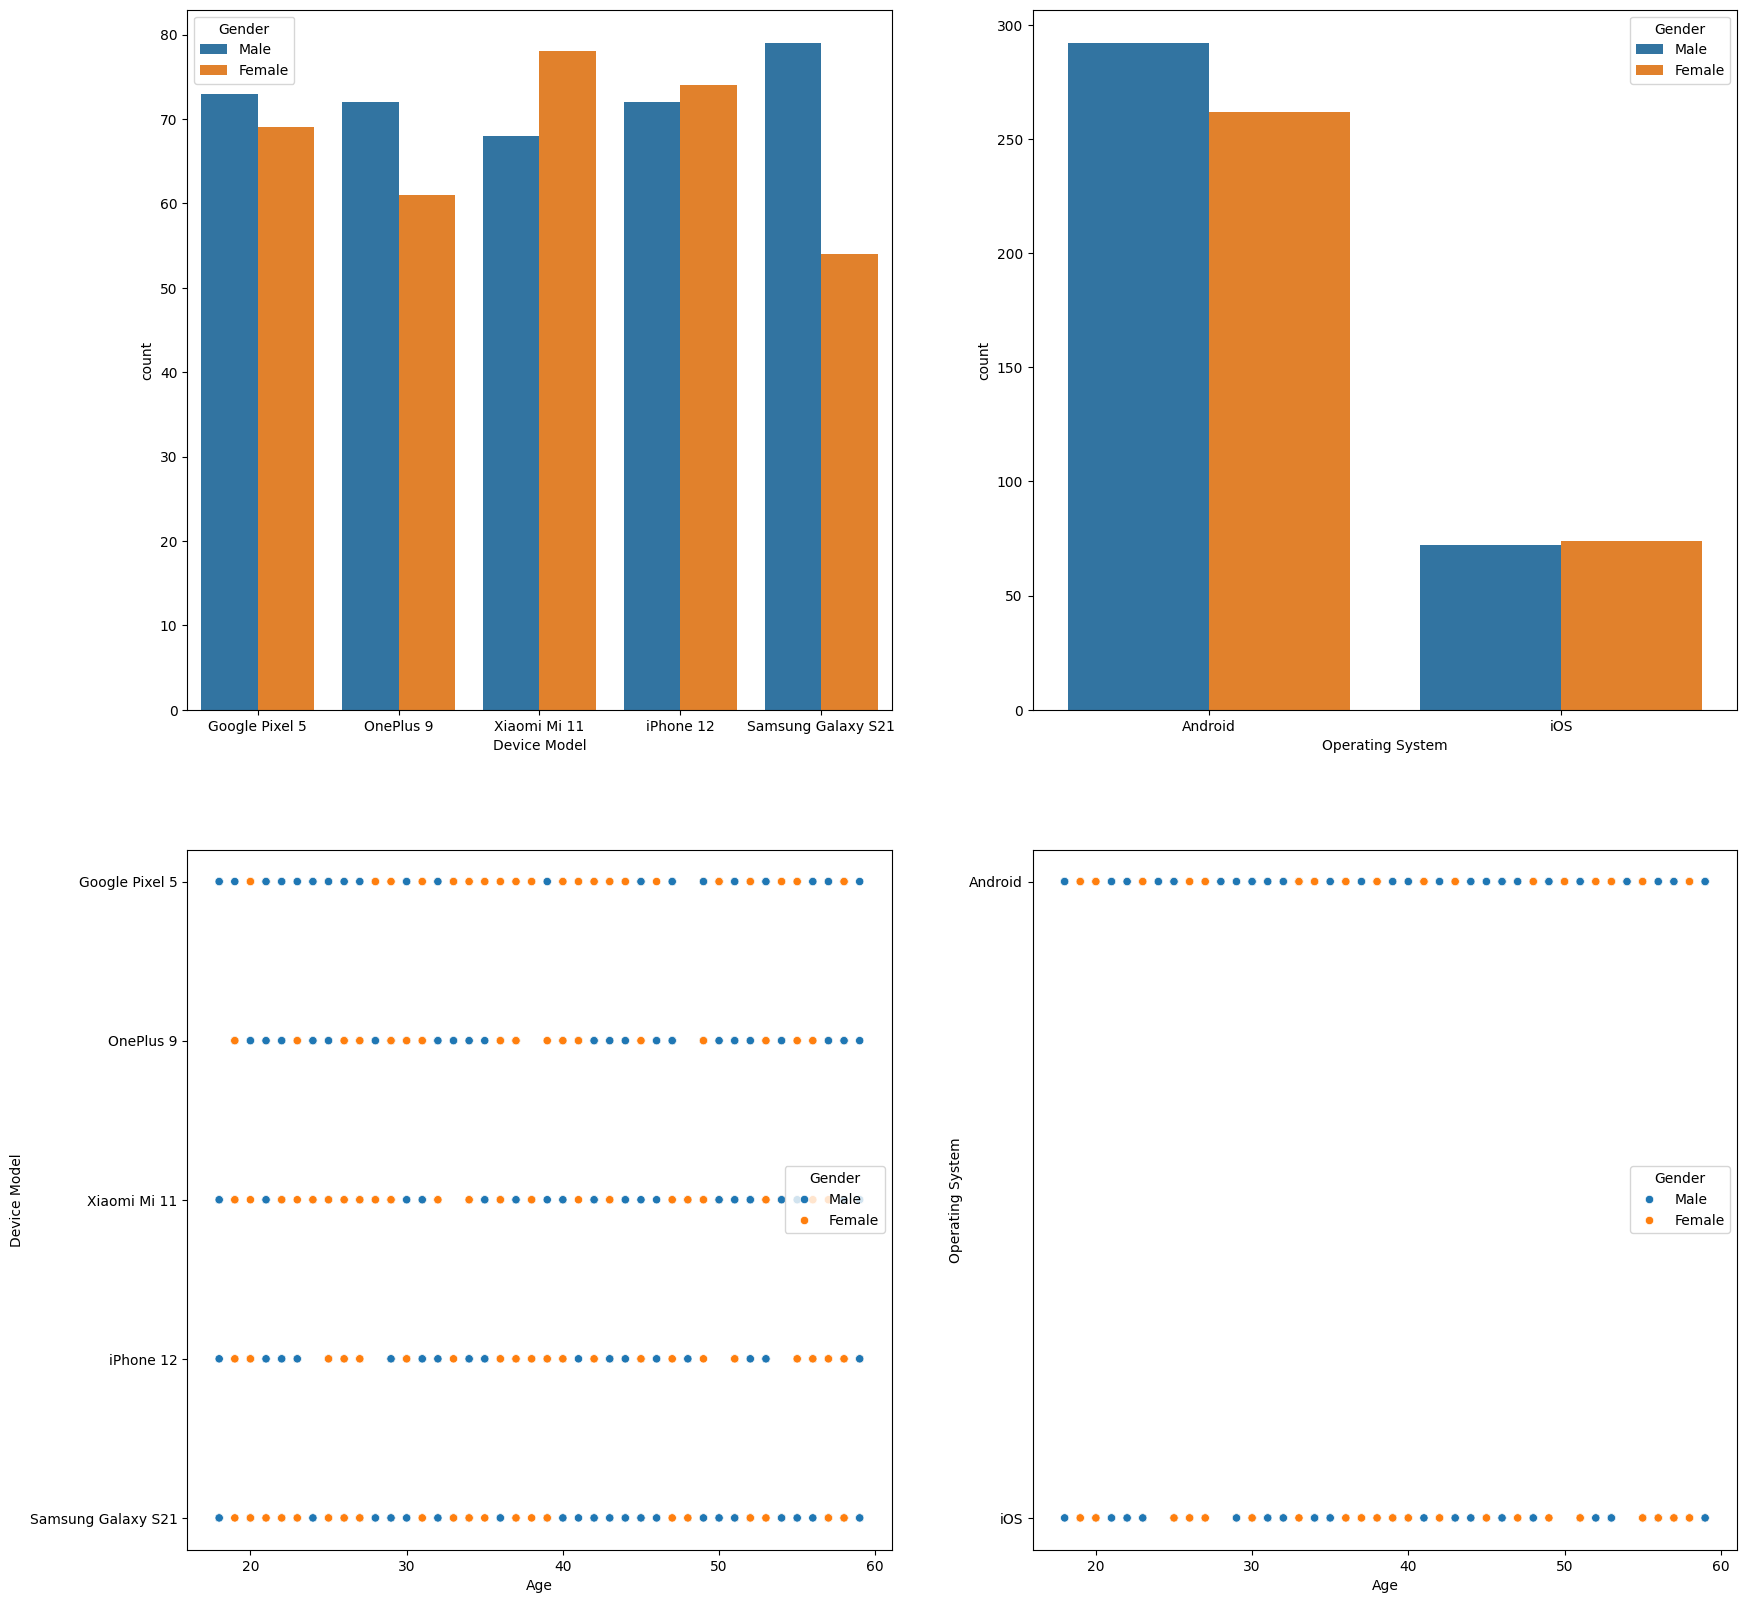

In [6]:
fig,ax=plt.subplots(2,2,figsize=(20,20))
sns.countplot(data=df,x='Device Model',hue='Gender',ax=ax[0][0])
sns.countplot(data=df,x='Operating System',hue='Gender',ax=ax[0][1])
sns.scatterplot(data=df,y='Device Model',x='Age',hue='Gender',ax=ax[1][0])
sns.scatterplot(data=df,y='Operating System',x='Age',hue='Gender',ax=ax[1][1])
plt.show()

**Deductions:**

**-> The first graph (TOP-LEFT) tries to find out relationship between Device Model and age:**
1. Google Pixel 5, One Plus 9 and Samsung Galaxy 21 has more male users than female users and Xiaomi and iPhone 12 has more female users than male  users
2. This itself might not be beneficial for us but future analysis might indicate some relationship between the target variable (User Behavior Class) and Phone brand which in turn might provide us with something related to Gender and target variable

**-> The Second graph (TOP-RIGHT) tries to find out relationship between Gender and Operating Systems:**
1. Android tends to have more male users, possibly due to its broader device offerings and flexibility.
2. IOS is more balanced in terms of gender distribution, suggesting it appeals equally to both males and females.

**-> The Third Graph (BOTTOM-LEFT) visualizes any relationship between Device model and Age:**
1. There is no clear device model preference based on age or gender, with models like the Samsung Galaxy S21 and iPhone 12 enjoying broad popularity across all groups, So there is no real pattern between them :(

**-> The Fourth Graph (BOTTOM-RIGHT) visualizes any relationship between choice of operating system and age:**
1. Android has a more diverse age representation compared to iOS, which skews younger. This could suggest that Android devices are more affordable or offer more variety for older users, while iOS appeals to younger, possibly more brand-conscious consumers. There is a slight trend but not really an important one

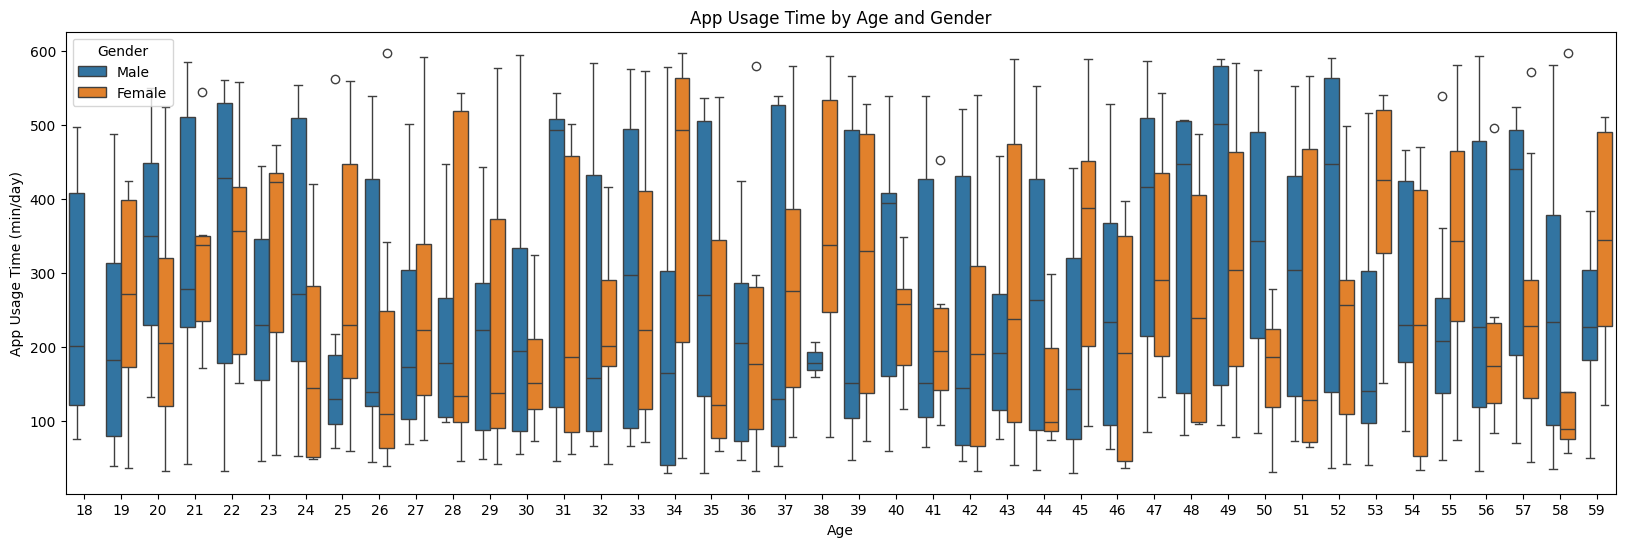

In [7]:
plt.figure(figsize=(20, 6))
sns.boxplot(x='Age', y='App Usage Time (min/day)', hue='Gender', data=df)
plt.title('App Usage Time by Age and Gender')
plt.show()

1. **General App Usage Time Variability:** Across all ages, there is considerable variability in app usage time for both males and females, with some ages showing a wider spread of usage times (e.g., ages 22, 31, 45) while others have a more concentrated range (e.g., ages 38, 41, 48).

2. **Outliers:** There are a few outliers, particularly around the older age groups (e.g., age 54, 59), suggesting that a few users report significantly higher app usage compared to others in their age group.

3. **Gender Differences:**

   In several age groups (e.g., ages 19, 26, 43), males appear to have a higher median app usage time than females.Conversely, females tend to use apps    more on average in certain age ranges, such as ages 23, 34, 53, 58, where their median usage time is higher compared to males.Some age groups (e.g.,    22, 32, 44) show almost equal median app usage between genders, indicating similar app usage behavior between males and females.

   Younger Age Groups: Users in their 20s tend to have higher variability in app usage time, especially around ages 20-25.Older Age Groups: Users in       their 50s show less variability, with tighter box plots, suggesting more consistent app usage behavior in older individuals.

   There does not seem to be a clear increasing or decreasing trend in app usage with age, implying that both young and older individuals have a wide      range of app usage patterns.However, certain age groups (e.g., 21, 34, 53) show notably higher usage times across both genders, which may indicate      lifestyle factors affecting these specific ages.

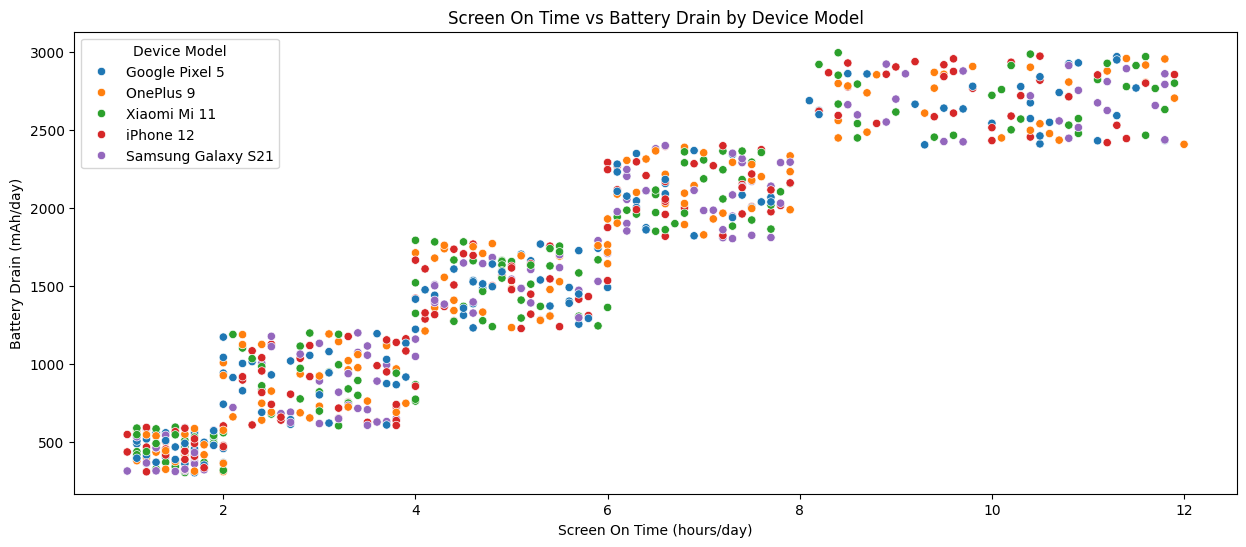

In [8]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x='Screen On Time (hours/day)', y='Battery Drain (mAh/day)', hue='Device Model', data=df)
plt.title('Screen On Time vs Battery Drain by Device Model')
plt.show()

**Findings:**

1. Distinct Groups by Screen Time: There are clear clusters based on screen on time. The devices exhibit step-like battery drain patterns where screen on time clusters around specific ranges, such as 2, 4, 6, 8, 10 hours/day.

2. Battery Drain Increases with Screen On Time: As expected, battery drain increases with longer screen-on times, with higher mAh consumption visible as screen time grows from left to right.

3. No Significant Device Outliers: All device models—Google Pixel 5, OnePlus 9, Xiaomi Mi 11, iPhone 12, and Samsung Galaxy S21—show similar distributions within these groups, with no one device standing out dramatically for better or worse performance.

4. Tight Grouping in Early Stages: For lower screen on times (around 2–4 hours), the battery drain is tightly grouped, indicating minimal variability in battery consumption for short usage durations.

5. Greater Spread at Higher Screen On Times: At higher screen times (8–12 hours), there is more variability in battery drain across devices, suggesting that extended use might have differing impacts on battery efficiency.

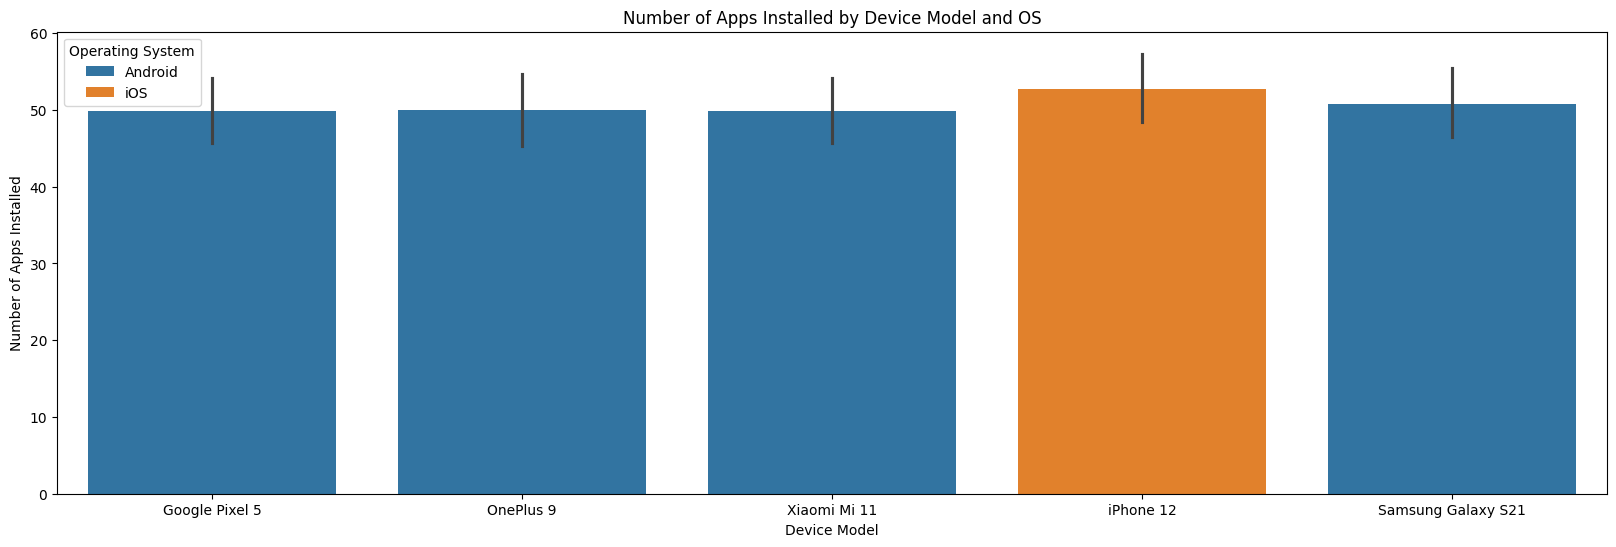

In [9]:
plt.figure(figsize=(20, 6))
sns.barplot(x='Device Model', y='Number of Apps Installed', hue='Operating System', data=df)
plt.title('Number of Apps Installed by Device Model and OS')
plt.show()


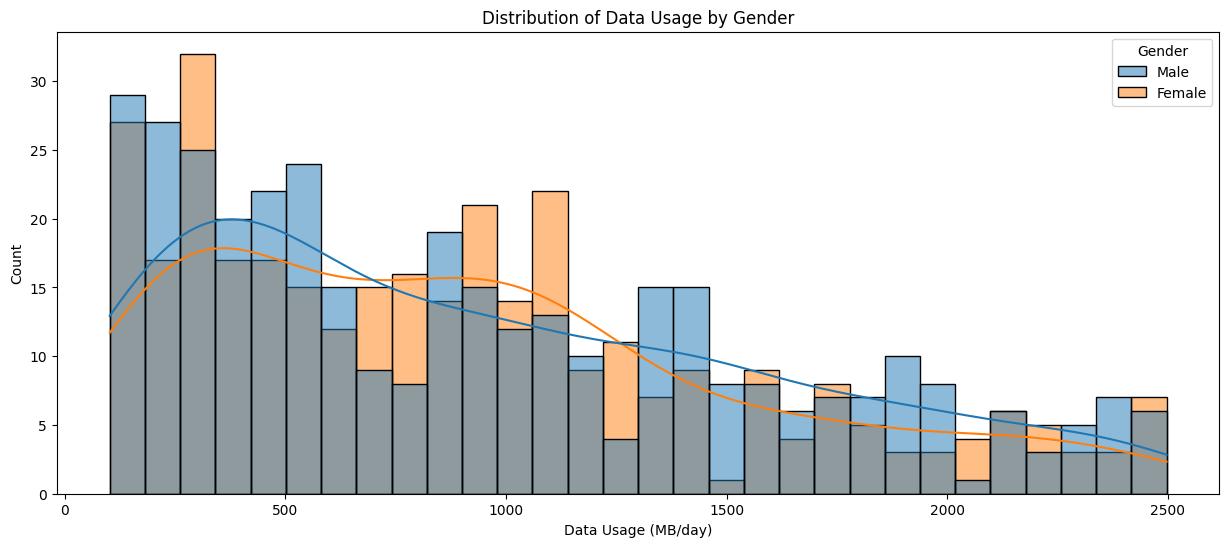

In [10]:
plt.figure(figsize=(15, 6))
sns.histplot(data=df, x='Data Usage (MB/day)', hue='Gender', bins=30, kde=True)
plt.title('Distribution of Data Usage by Gender')
plt.show()


1. Data Usage Concentration: Both males and females show the highest count of users in the lower data usage range (0–500 MB/day). This suggests that most users, regardless of gender, consume relatively small amounts of data daily.

2. Males and Females Have Different Peaks: The density plot (KDE) for males peaks earlier (around 500 MB/day), while for females, it peaks slightly later (around 700 MB/day), suggesting that females tend to consume a bit more data on average compared to males.

3. Overall Distribution Shape: The distribution for both genders declines as data usage increases, with both groups having fewer users consuming more than 1500 MB/day. This indicates that heavy data usage is less common for both genders.

4. Higher Data Usage Among Males: In the higher data usage categories (above 1000 MB/day), the number of male users generally exceeds that of female users, particularly in the 1500–2500 MB/day range.

5. Female Dominance in Mid-Range Usage: Females appear to dominate the middle range (500–1000 MB/day), indicating a higher proportion of moderate data users compared to males.

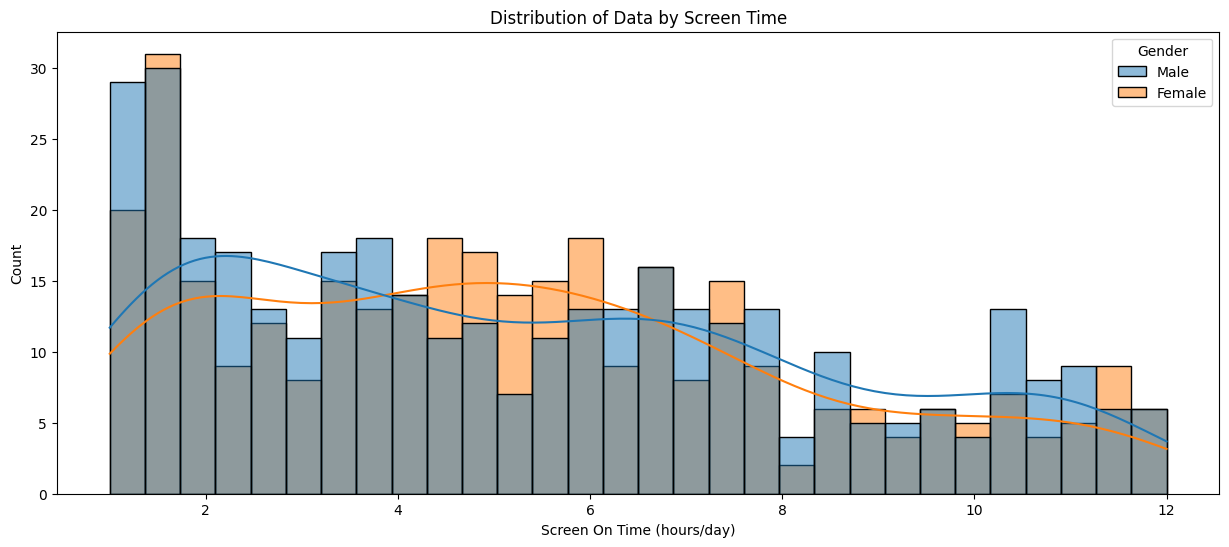

In [11]:
plt.figure(figsize=(15, 6))
sns.histplot(data=df, x='Screen On Time (hours/day)', hue='Gender', bins=30, kde=True)
plt.title('Distribution of Data by Screen Time')
plt.show()


1. Most participants spend 1-3 hours/day on screens.
2. Males generally have higher screen time than females, especially in the 1-5 hour range.
3. Female screen time is more concentrated in 4-6 hours, with fewer reporting high screen times (above 7 hours).
4. Males have a broader screen time distribution, while females' usage is more concentrated.
5. Both genders peak at 1-2 hours/day.

****
## Data Preprocessing ##
****

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [13]:
df.isnull().any()   #Checking for Null values

User ID                       False
Device Model                  False
Operating System              False
App Usage Time (min/day)      False
Screen On Time (hours/day)    False
Battery Drain (mAh/day)       False
Number of Apps Installed      False
Data Usage (MB/day)           False
Age                           False
Gender                        False
User Behavior Class           False
dtype: bool

In [14]:
#Dropping unwanted columns
df.drop(columns='User ID',inplace=True,axis=1)

In [15]:
for col in df.columns[df.dtypes=='object']:
    print(df[col].value_counts(),'\n\n')

Device Model
Xiaomi Mi 11          146
iPhone 12             146
Google Pixel 5        142
OnePlus 9             133
Samsung Galaxy S21    133
Name: count, dtype: int64 


Operating System
Android    554
iOS        146
Name: count, dtype: int64 


Gender
Male      364
Female    336
Name: count, dtype: int64 




In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le=LabelEncoder()    #Encoding categorical values
for col in df.columns[df.dtypes=='object']:
    df[col]=le.fit_transform(df[col])

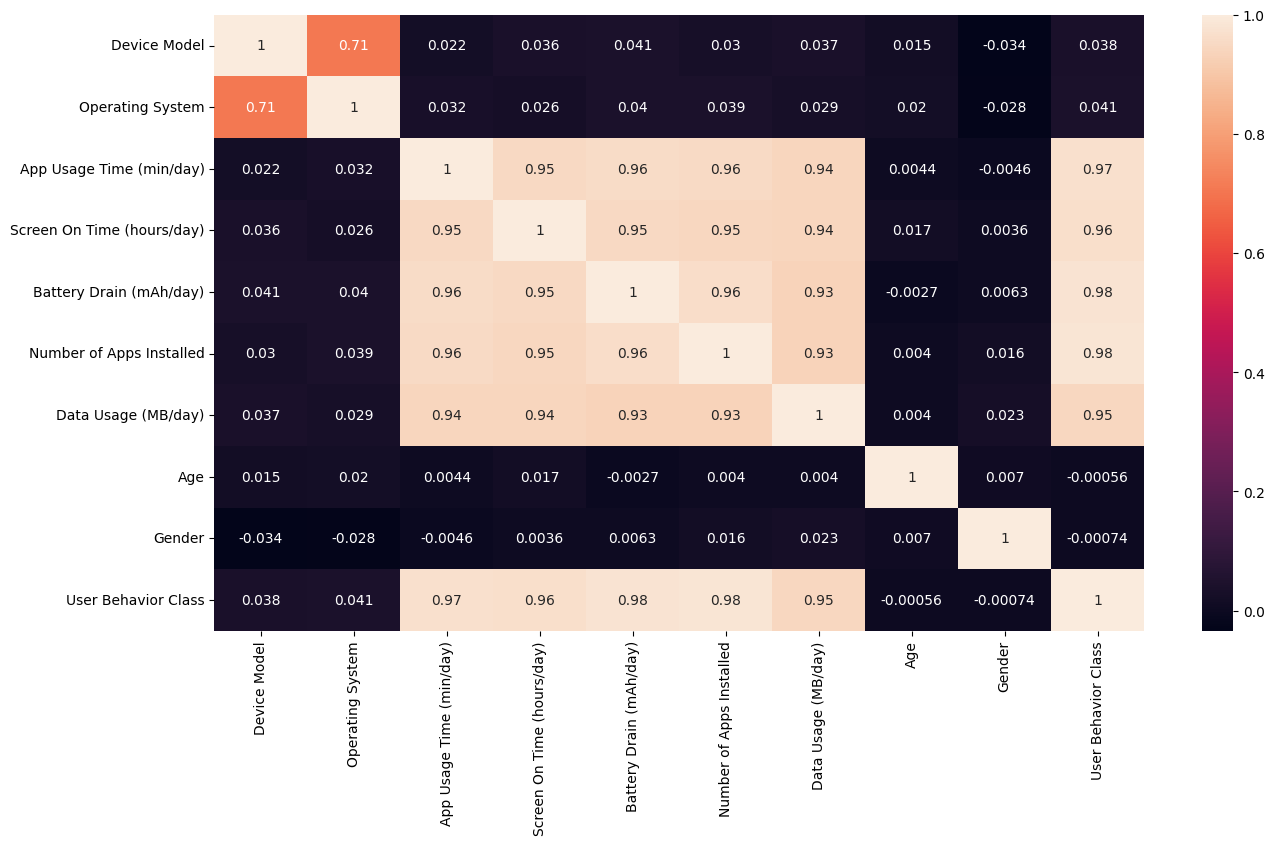

In [18]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [19]:
#Creating New Features (Derived from existing)
df['Data_consumption_for_app']=df['App Usage Time (min/day)']/df['Data Usage (MB/day)']
df['App_Usage_Prop']=df['App Usage Time (min/day)']/(df['Screen On Time (hours/day)']*60)   

#We can have more features by playing with the columns, these two are just one of the few examples.
#The below heatmap provides you with how both of the new features are correlated with the Target variable

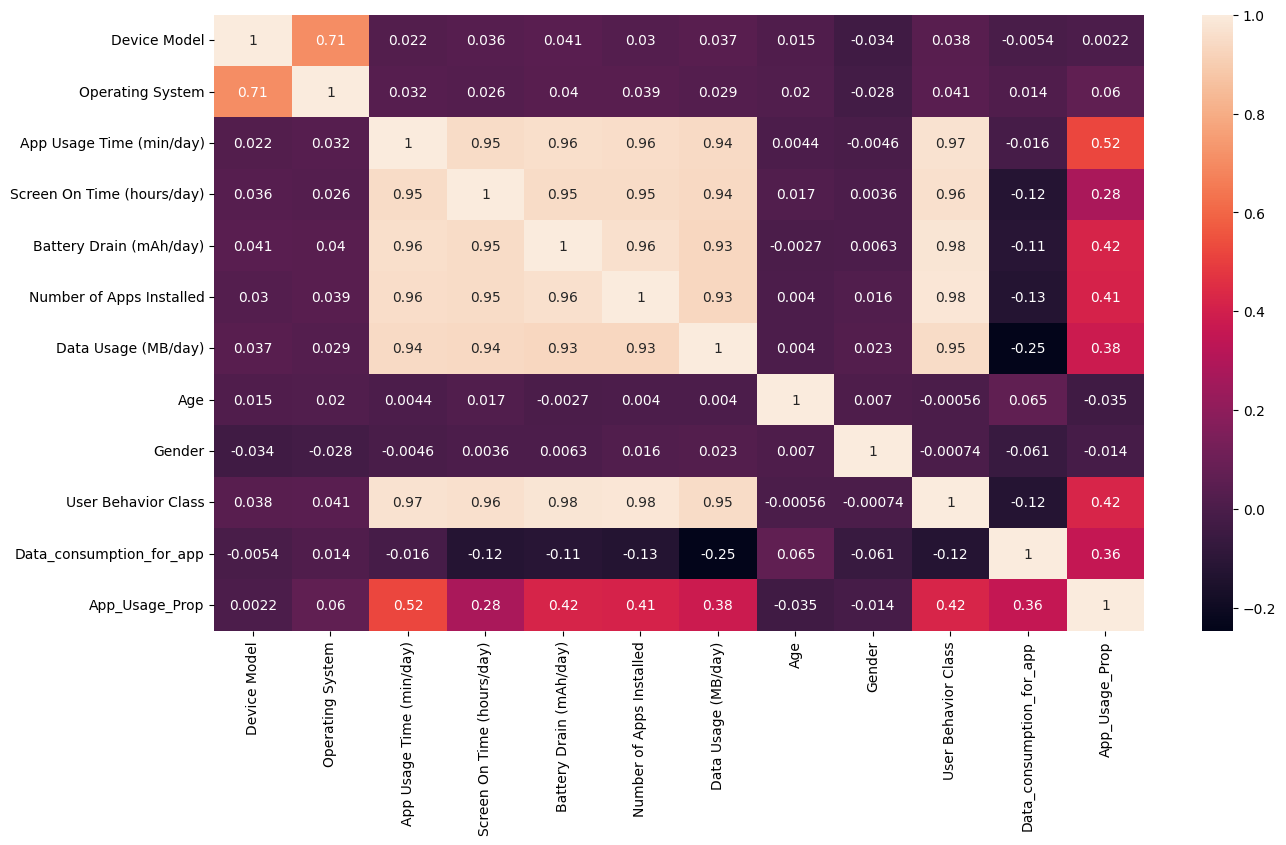

In [20]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Device Model                700 non-null    int32  
 1   Operating System            700 non-null    int32  
 2   App Usage Time (min/day)    700 non-null    int64  
 3   Screen On Time (hours/day)  700 non-null    float64
 4   Battery Drain (mAh/day)     700 non-null    int64  
 5   Number of Apps Installed    700 non-null    int64  
 6   Data Usage (MB/day)         700 non-null    int64  
 7   Age                         700 non-null    int64  
 8   Gender                      700 non-null    int32  
 9   User Behavior Class         700 non-null    int64  
 10  Data_consumption_for_app    700 non-null    float64
 11  App_Usage_Prop              700 non-null    float64
dtypes: float64(3), int32(3), int64(6)
memory usage: 57.6 KB


In [22]:
#Splitting the data
from sklearn.model_selection import train_test_split
x=df.drop(columns='User Behavior Class')
y=df['User Behavior Class']
x_t,x_te,y_t,y_te=train_test_split(x,y,test_size=0.25,random_state=20)

****
## Models :) ##
****

In [23]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix

**K Nearest Neighbors Classifier**

In [24]:
knn=KNeighborsClassifier()
params={'n_neighbors':list(np.arange(2,32))}
nknn=RandomizedSearchCV(knn,random_state=20,scoring='accuracy',param_distributions=params,cv=10)
nknn.fit(x_t,y_t)
print(nknn.best_params_)
print(nknn.best_score_)
nknn=nknn.best_estimator_

{'n_neighbors': 6}
1.0


In [25]:
pred_t=nknn.predict(x_t)
pred=nknn.predict(x_te)

**Decision Tree Classifier**

In [26]:
dt=DecisionTreeClassifier()
path=dt.cost_complexity_pruning_path(x_t,y_t)
alphas=path.ccp_alphas
params={'ccp_alpha':alphas}
ndt=RandomizedSearchCV(dt,random_state=20,scoring='accuracy',param_distributions=params,n_jobs=-1,n_iter=3,cv=10)
ndt.fit(x_t,y_t)
print(ndt.best_params_)
print(ndt.best_score_)
ba=ndt.best_params_['ccp_alpha']

{'ccp_alpha': 0.0}
0.9961901306240929


In [27]:
dt=DecisionTreeClassifier(ccp_alpha=ba)
params={'criterion':['gini','entropy'],'min_samples_split':list(np.arange(2,41)),'min_samples_leaf':list(np.arange(2,41)),
        'max_depth':list(np.arange(1,10))}
ndt=RandomizedSearchCV(dt,random_state=20,scoring='accuracy',param_distributions=params,n_jobs=-1,cv=10)
ndt.fit(x_t,y_t)
print(ndt.best_params_)
print(ndt.best_score_)
ndt=ndt.best_estimator_

{'min_samples_split': 34, 'min_samples_leaf': 33, 'max_depth': 9, 'criterion': 'entropy'}
0.9981132075471699


In [28]:
pred1_t=ndt.predict(x_t)
pred1=ndt.predict(x_te)

**Random Forest Classifier**

In [29]:
rf=RandomForestClassifier()
parmas=params={'criterion':['gini','entropy'],'min_samples_split':list(np.arange(2,41)),'min_samples_leaf':list(np.arange(2,41)),
        'max_depth':list(np.arange(1,10)),'n_estimators':[1000]}
nrf=RandomizedSearchCV(rf,random_state=20,scoring='accuracy',param_distributions=params,n_jobs=-1,cv=10)
nrf.fit(x_t,y_t)
print(nrf.best_params_)
print(nrf.best_score_)
nrf=nrf.best_estimator_

{'n_estimators': 1000, 'min_samples_split': 39, 'min_samples_leaf': 14, 'max_depth': 2, 'criterion': 'entropy'}
1.0


In [30]:
pred2_t=nrf.predict(x_t)
pred2=nrf.predict(x_te)

**AdaBoost Classifier**

In [31]:
ada=AdaBoostClassifier(algorithm='SAMME')
params={'n_estimators':[1000],'learning_rate': np.arange(0.01, 2.01, 0.01)}
nada=RandomizedSearchCV(ada,param_distributions=params,cv=10,n_jobs=-1,scoring='accuracy')
nada.fit(x_t ,y_t)
print(nada.best_params_)
print(nada.best_score_)
nada=nada.best_estimator_

{'n_estimators': 1000, 'learning_rate': 1.82}
1.0


In [32]:
pred3_t=nada.predict(x_t)
pred3=nada.predict(x_te)

In [33]:
report_knn=classification_report(y_te,pred)
report_dt=classification_report(y_te,pred1)
report_rf=classification_report(y_te,pred2)
report_ada=classification_report(y_te,pred3)
print('KNN\n',report_knn)
print('\n\nDecision Tree Classifier\n',report_dt)
print('\n\nRandom Forest Classifier\n',report_rf)
print('\n\nAdaBoost Classifier\n',report_ada)

KNN
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        37
           3       1.00      1.00      1.00        39
           4       1.00      1.00      1.00        33
           5       1.00      1.00      1.00        31

    accuracy                           1.00       175
   macro avg       1.00      1.00      1.00       175
weighted avg       1.00      1.00      1.00       175



Decision Tree Classifier
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        37
           3       1.00      1.00      1.00        39
           4       1.00      1.00      1.00        33
           5       1.00      1.00      1.00        31

    accuracy                           1.00       175
   macro avg       1.00      1.00      1.00       175
weighted avg       1.00      1.00      1.00 

In [34]:
tdf=pd.DataFrame({'Classification Algorithms':['KNN','Decision Tree Classifier','Random Forest Classifier','AdaBoost Classifier'],
                  'Training Accuracy':[accuracy_score(y_t,pred_t),accuracy_score(y_t,pred1_t),accuracy_score(y_t,pred2_t),accuracy_score(y_t,pred3_t)],
                  'Training Precision':[precision_score(y_t,pred_t,average='macro'),precision_score(y_t,pred1_t,average='macro'),precision_score(y_t,pred2_t,average='macro'),precision_score(y_t,pred3_t,average='macro')],
                  'Training Recall':[recall_score(y_t,pred_t,average='macro'),recall_score(y_t,pred1_t,average='macro'),recall_score(y_t,pred2_t,average='macro'),recall_score(y_t,pred3_t,average='macro')],
                  'Training F1 Score':[f1_score(y_t,pred_t,average='macro'),f1_score(y_t,pred1_t,average='macro'),f1_score(y_t,pred2_t,average='macro'),f1_score(y_t,pred3_t,average='macro')]})
tdf

,Classification Algorithms,Training Accuracy,Training Precision,Training Recall,Training F1 Score
0,KNN,1.0,1.0,1.0,1.0
1,Decision Tree Classifier,1.0,1.0,1.0,1.0
2,Random Forest Classifier,1.0,1.0,1.0,1.0
3,AdaBoost Classifier,1.0,1.0,1.0,1.0


In [35]:
tedf=pd.DataFrame({'Classification Algorithms':['KNN','Decision Tree Classifier','Random Forest Classifier','AdaBoost Classifier'],
                  'Testing Accuracy':[accuracy_score(y_te,pred),accuracy_score(y_te,pred1),accuracy_score(y_te,pred2),accuracy_score(y_te,pred3)],
                  'Testing Precision':[precision_score(y_te,pred,average='macro'),precision_score(y_te,pred1,average='macro'),precision_score(y_te,pred2,average='macro'),precision_score(y_te,pred3,average='macro')],
                  'Testing Recall':[recall_score(y_te,pred,average='macro'),recall_score(y_te,pred1,average='macro'),recall_score(y_te,pred2,average='macro'),recall_score(y_te,pred3,average='macro')],
                  'Testing F1 Score':[f1_score(y_te,pred,average='macro'),f1_score(y_te,pred1,average='macro'),f1_score(y_te,pred2,average='macro'),f1_score(y_te,pred3,average='macro')]})
tedf

,Classification Algorithms,Testing Accuracy,Testing Precision,Testing Recall,Testing F1 Score
0,KNN,1.000000,1.000000,1.000000,1.000000
1,Decision Tree Classifier,1.000000,1.000000,1.000000,1.000000
2,Random Forest Classifier,1.000000,1.000000,1.000000,1.000000
3,AdaBoost Classifier,0.994286,0.994118,0.993548,0.993736


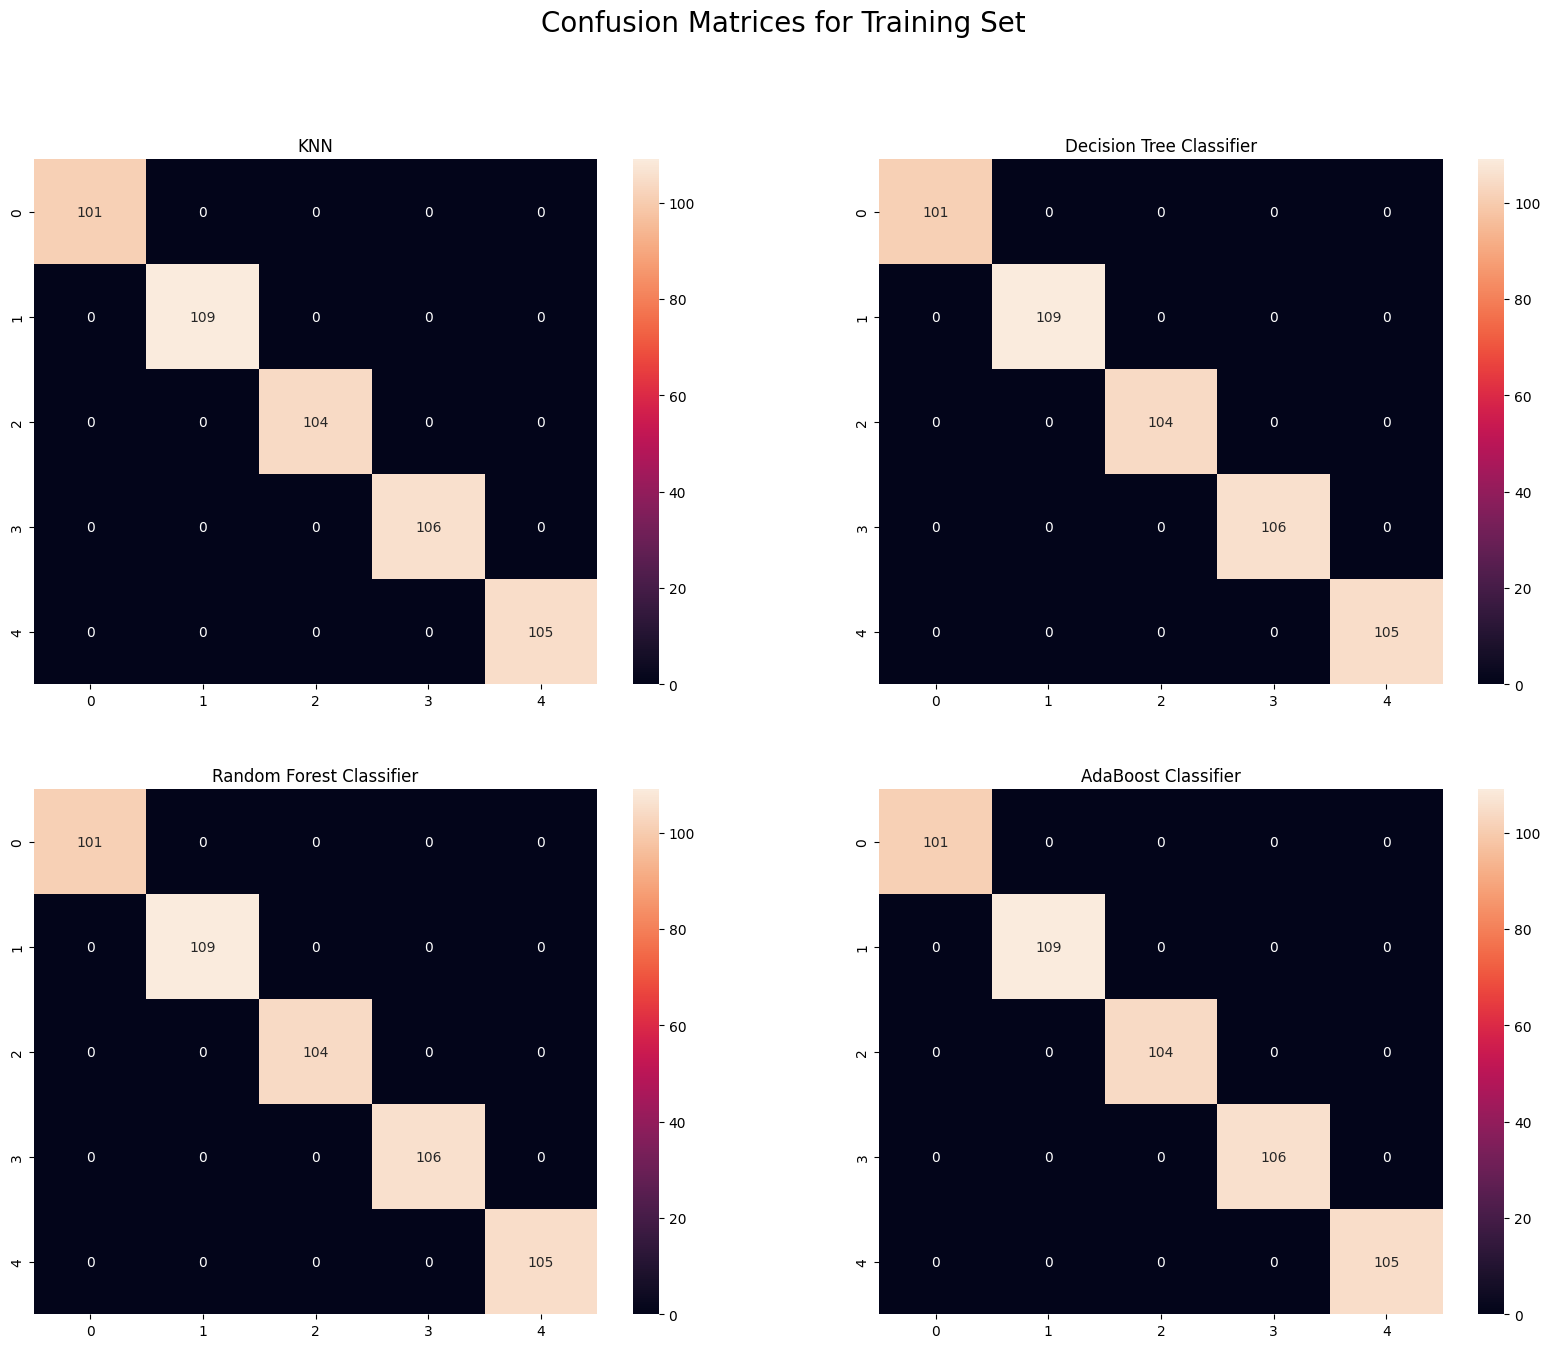

In [36]:
fig,ax=plt.subplots(2,2,figsize=(20,15))
sns.heatmap(confusion_matrix(pred_t,y_t),annot=True,ax=ax[0][0],fmt='d')
ax[0][0].set_title('KNN')
sns.heatmap(confusion_matrix(pred1_t,y_t),annot=True,ax=ax[0][1],fmt='d')
ax[0][1].set_title('Decision Tree Classifier')
sns.heatmap(confusion_matrix(pred2_t,y_t),annot=True,ax=ax[1][0],fmt='d')
ax[1][0].set_title('Random Forest Classifier')
sns.heatmap(confusion_matrix(pred3_t,y_t),annot=True,ax=ax[1][1],fmt='d')
ax[1][1].set_title('AdaBoost Classifier')
plt.suptitle('Confusion Matrices for Training Set',fontsize=20)
plt.show()

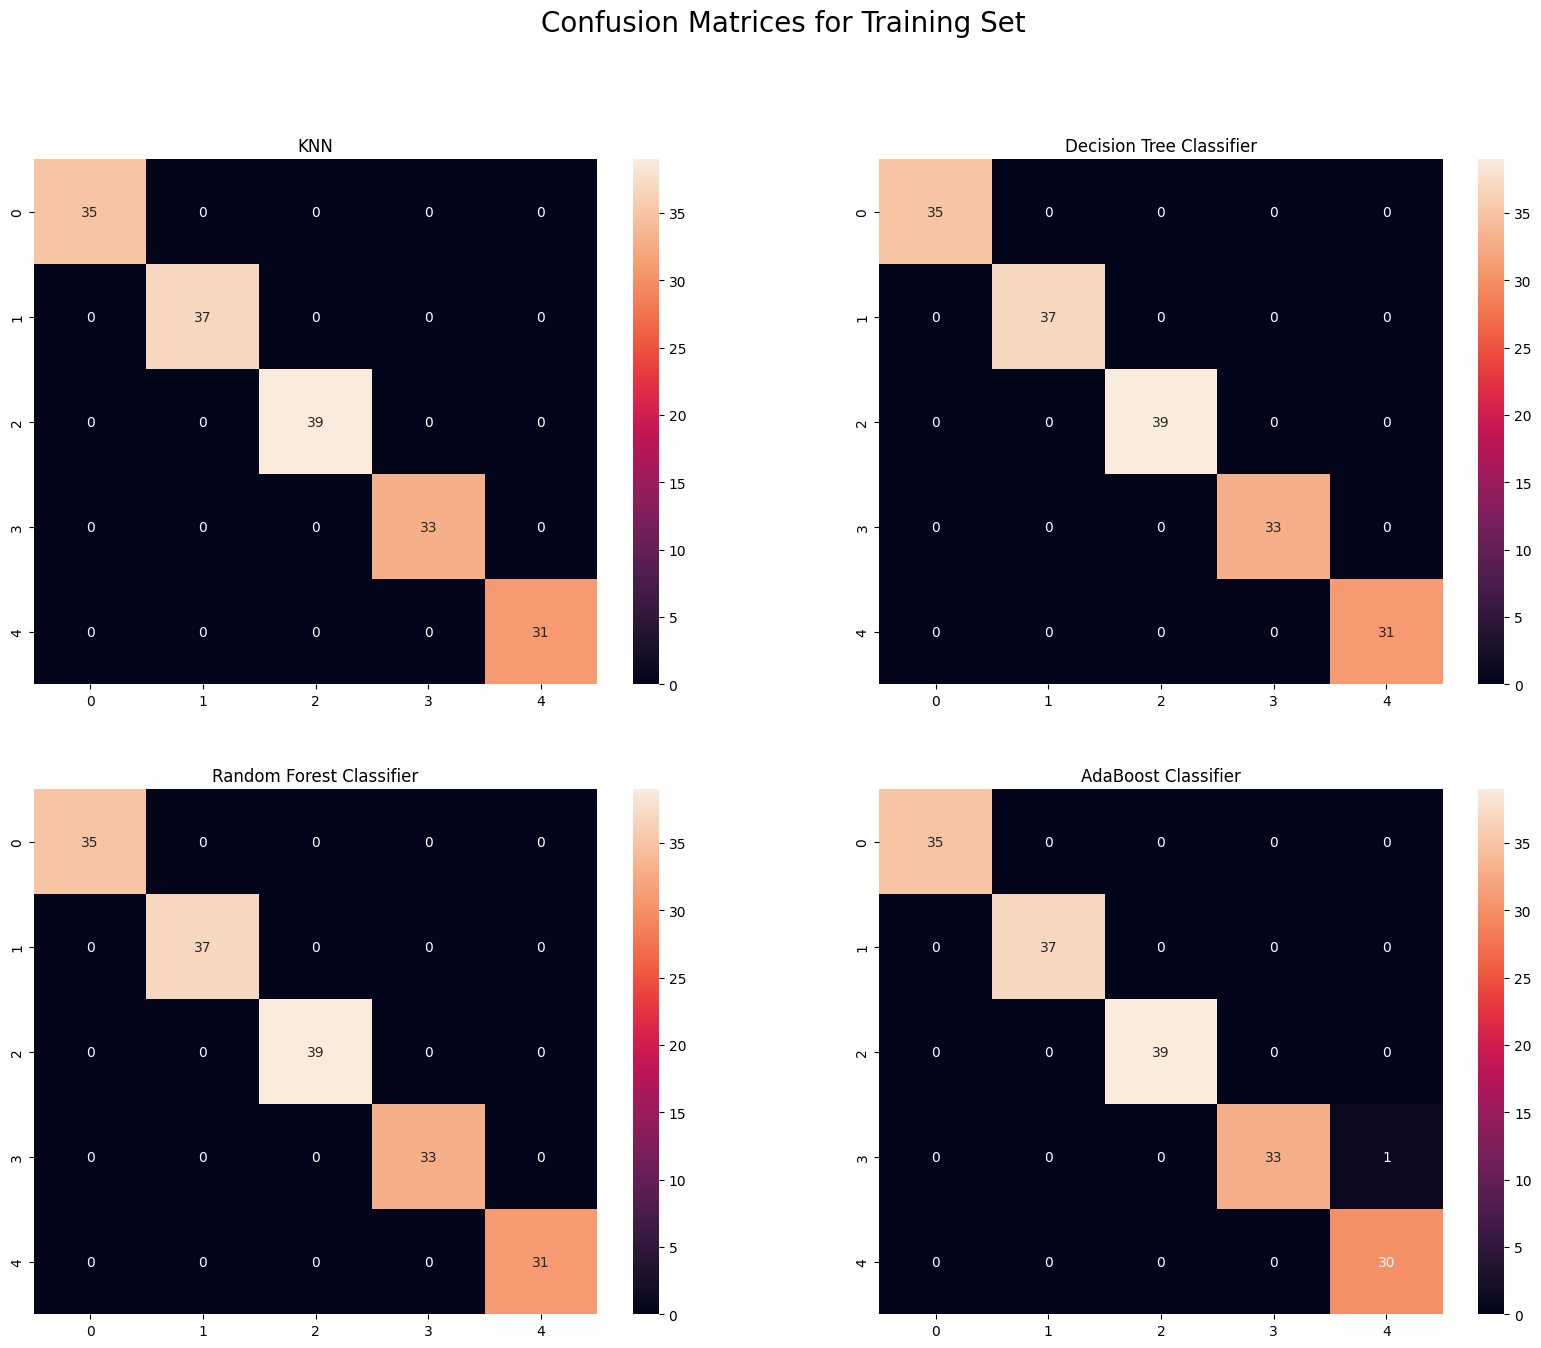

In [37]:
fig,ax=plt.subplots(2,2,figsize=(20,15))
sns.heatmap(confusion_matrix(pred,y_te),annot=True,ax=ax[0][0],fmt='d')
ax[0][0].set_title('KNN')
sns.heatmap(confusion_matrix(pred1,y_te),annot=True,ax=ax[0][1],fmt='d')
ax[0][1].set_title('Decision Tree Classifier')
sns.heatmap(confusion_matrix(pred2,y_te),annot=True,ax=ax[1][0],fmt='d')
ax[1][0].set_title('Random Forest Classifier')
sns.heatmap(confusion_matrix(pred3,y_te),annot=True,ax=ax[1][1],fmt='d')
ax[1][1].set_title('AdaBoost Classifier')
plt.suptitle('Confusion Matrices for Training Set',fontsize=20)
plt.show()

****
## Conclusion ##
****

**In this analysis, we evaluated four different classification algorithms: K-Nearest Neighbors (KNN), Decision Tree Classifier, Random Forest Classifier, and AdaBoost Classifier. Each model achieved perfect performance metrics across both training and testing datasets**

These results indicate that all models effectively learned the underlying patterns of the data without overfitting, as evidenced by their equal performance on both training and testing sets. The consistently high precision, recall, and F1 scores across all classifiers suggest robust predictive capabilities.

Given this performance, any of these models could be reliably deployed in practice. Further analysis may explore potential variations in hyperparameters or the impact of additional features to enhance generalization in more complex datasets.